<a href="https://colab.research.google.com/github/shilpapanniru/ShilpaReddyDS/blob/main/Dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierarchichal Clustering
- grouping similar things together, building a hierarchy (tree-like structure) of groups.
- Why important? Because in real life we rarely know the exact number of clusters beforehand.

## DENDROGRAM
- A tree-like diagram that shows how data points are merged or split step by step.
   

###1.  AGGLOMERATIVE CLUSTERING
- **BOTTOM-UP** approach
- Start with each data point as its own clusters
- At each step, merge two closest clusters
- Continue until everything merges into one big cluster

###2. DIVISIVE CLUSTERING
- **TOP-DOWN** approach
- Start with all data in one cluster
- Split the cluster into smaller clusters step by step
- Continue until each point is its own cluster

**WHY NOT DIVISIVE??**
1. Not directly available in scipy or sklearn
2. Computationally complex/heavier
3. Interpretability -> agglomerative is better, divisive is harder to interpret
4. Real-world use: in practice, agglomerative is more stable and widely used, so libraries focus on it
------------------------------------------------------------------------

###REAL WORLD APPLICATIONS
1. Customer Segmentation(Retail,e-commerce)
2. Document Clustering(NLP, text mining)
3. Gene sequence analysis(bioinformatics)
4. Image grouping(computer vision)

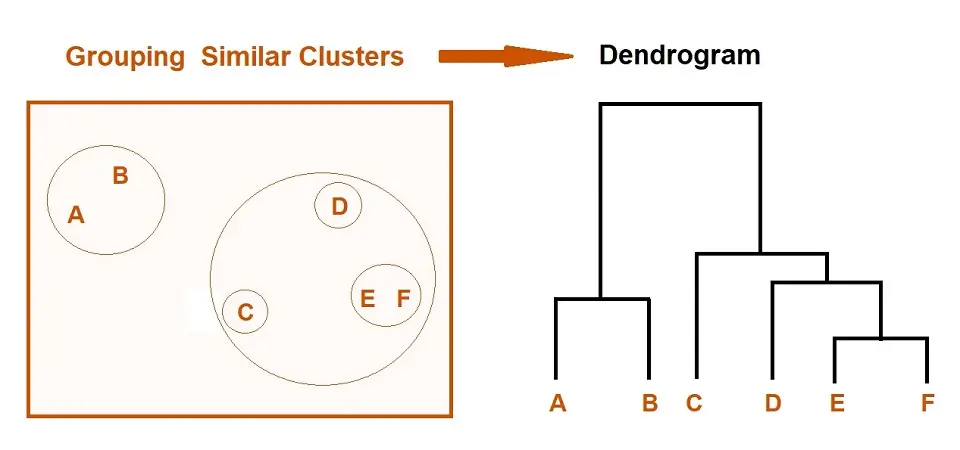

# **Problem Statement**
- You are working as a data analyst at a retail company. You have been provided with customer data and are tasked with identifying distinct customer groups using Hierarchical Clustering. Your goal is to help the marketing team target each customer segment more effectively.

In [ ]:
# Dataset Link: https://drive.google.com/file/d/1kj_isJ2cHuhheK5PO3OjgNiit2FLQIDC/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/hierarchical_clustering_data.csv')
df

,CustomerID,Annual_Income,Spending_Score,Age,Region
0,1001,67450,17.58,31,North
1,1002,57926,11.35,27,West
2,1003,69715,64.01,38,East
3,1004,82845,70.94,48,North
4,1005,56487,4.13,16,North
...,...,...,...,...,...
995,1996,55783,28.79,28,South
996,1997,86965,21.49,22,East
997,1998,69612,52.14,24,East
998,1999,51432,1.55,30,South


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Annual_Income   1000 non-null   int64  
 2   Spending_Score  1000 non-null   float64
 3   Age             1000 non-null   int64  
 4   Region          1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,CustomerID,Annual_Income,Spending_Score,Age
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,1500.500000,60289.47500,50.861300,34.631000
std,288.819436,14688.23654,28.547316,9.700667
min,1001.000000,11380.00000,1.320000,4.000000
25%,1250.750000,50285.75000,25.475000,28.000000
50%,1500.500000,60379.00000,52.095000,35.000000
75%,1750.250000,69718.75000,74.887500,41.000000
max,2000.000000,117790.00000,99.940000,66.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Annual_Income,0
Spending_Score,0
Age,0
Region,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Region'].value_counts()

,count
Region,
South,274
East,251
North,240
West,235


In [ ]:
from sklearn.preprocessing import StandardScaler

ls=['Annual_Income','Spending_Score','Age']

x=df[ls]

In [ ]:
x

,Annual_Income,Spending_Score,Age
0,67450,17.58,31
1,57926,11.35,27
2,69715,64.01,38
3,82845,70.94,48
4,56487,4.13,16
...,...,...,...
995,55783,28.79,28
996,86965,21.49,22
997,69612,52.14,24
998,51432,1.55,30


In [ ]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.48774459, -1.16641275, -0.37449145],
       [-0.16098989, -1.38475612, -0.78704055],
       [ 0.64202679,  0.46082368,  0.34746948],
       ...,
       [ 0.63501086,  0.04481472, -1.09645238],
       [-0.60333363, -1.72821761, -0.47762872],
       [ 0.56526033, -1.72085772, -0.37449145]])

In [ ]:
#Single Linkage: dist b/w 2 clusters = min dist b/w any point in cluster A and any point in cluster B
#Complete Linkage: dist b/w 2 clusters = max dist b/w any point in cluster A and any point in cluster B
#Average Linkage: dist b/w 2 clusters = average dist b/w all pairs of points across clusters
#Wards Linkage: merge clusters that(change the structure the least) keep data most compact, minimizes variance

In [ ]:
#Linkage: how clusters are merged step by step
#Fcluster: Final cluster -> dendrogram
#Dendrogram: plot the dendrogram
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram

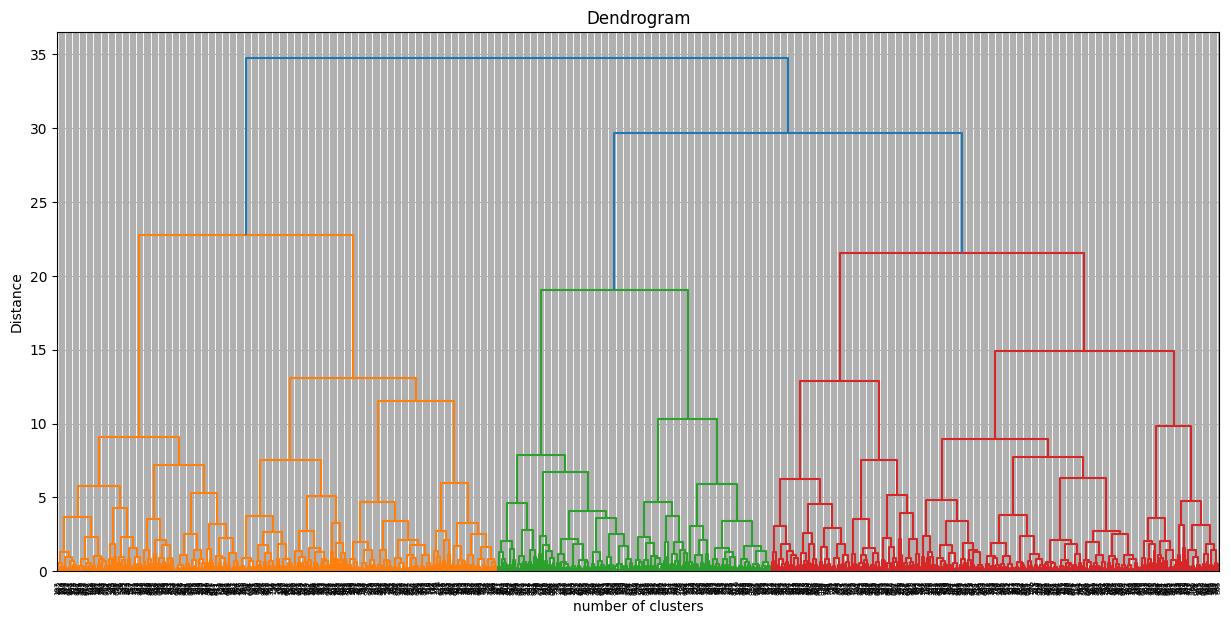

In [ ]:
plt.figure(figsize=(15,7))

dendrogram(linkage(x_scaled, method="ward"))
plt.xlabel("number of clusters")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.grid(True)
plt.show()

1. **Y-axis** - represents the distance(dissimilarity) at which clusters are merged
   - Small height= very similar clusters
   - Large height= very different clusters

In [ ]:
# k=4 with distance ~=24, clusters

In [ ]:
link=linkage(x_scaled, method='ward')

cluster=fcluster(link,t=4, criterion='maxclust')
#t4 with maxclust:FORM EXACTLY 4 CLUSTERS FROM THIS HIERARCHY

cluster

array([2, 2, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 1, 3, 2, 3, 2, 3, 4, 3,
       2, 1, 1, 2, 3, 4, 3, 2, 2, 4, 4, 2, 4, 3, 2, 3, 3, 4, 2, 4, 2, 2,
       1, 1, 3, 4, 3, 1, 2, 2, 3, 4, 4, 3, 2, 3, 4, 3, 3, 2, 1, 1, 3, 4,
       3, 4, 4, 2, 4, 4, 2, 4, 3, 4, 4, 2, 4, 3, 1, 4, 4, 4, 2, 1, 3, 4,
       4, 4, 3, 4, 3, 2, 1, 1, 2, 4, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 4,
       3, 3, 4, 4, 1, 2, 4, 1, 4, 4, 2, 2, 4, 3, 4, 4, 1, 1, 3, 3, 2, 3,
       3, 3, 2, 4, 2, 3, 4, 2, 2, 4, 1, 4, 3, 4, 3, 1, 4, 2, 4, 4, 3, 4,
       4, 3, 4, 4, 1, 3, 3, 4, 4, 3, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 4, 4,
       4, 4, 1, 4, 4, 3, 3, 4, 3, 2, 4, 2, 1, 1, 1, 4, 2, 1, 2, 2, 2, 1,
       4, 3, 4, 4, 4, 4, 1, 1, 4, 4, 2, 4, 4, 4, 4, 3, 3, 4, 3, 2, 2, 2,
       4, 3, 4, 3, 2, 3, 2, 2, 1, 2, 1, 2, 4, 2, 4, 4, 1, 2, 2, 4, 1, 4,
       4, 4, 1, 2, 1, 1, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 3, 2, 3, 3,
       1, 2, 4, 1, 3, 2, 4, 1, 4, 2, 1, 2, 4, 3, 2, 2, 2, 4, 4, 1, 4, 1,
       4, 4, 3, 2, 3, 1, 1, 4, 4, 3, 2, 2, 4, 3, 2,

In [ ]:
df['ClusterID']=cluster

In [ ]:
df

,CustomerID,Annual_Income,Spending_Score,Age,Region,ClusterID
0,1001,67450,17.58,31,North,2
1,1002,57926,11.35,27,West,2
2,1003,69715,64.01,38,East,4
3,1004,82845,70.94,48,North,4
4,1005,56487,4.13,16,North,2
...,...,...,...,...,...,...
995,1996,55783,28.79,28,South,2
996,1997,86965,21.49,22,East,2
997,1998,69612,52.14,24,East,4
998,1999,51432,1.55,30,South,2


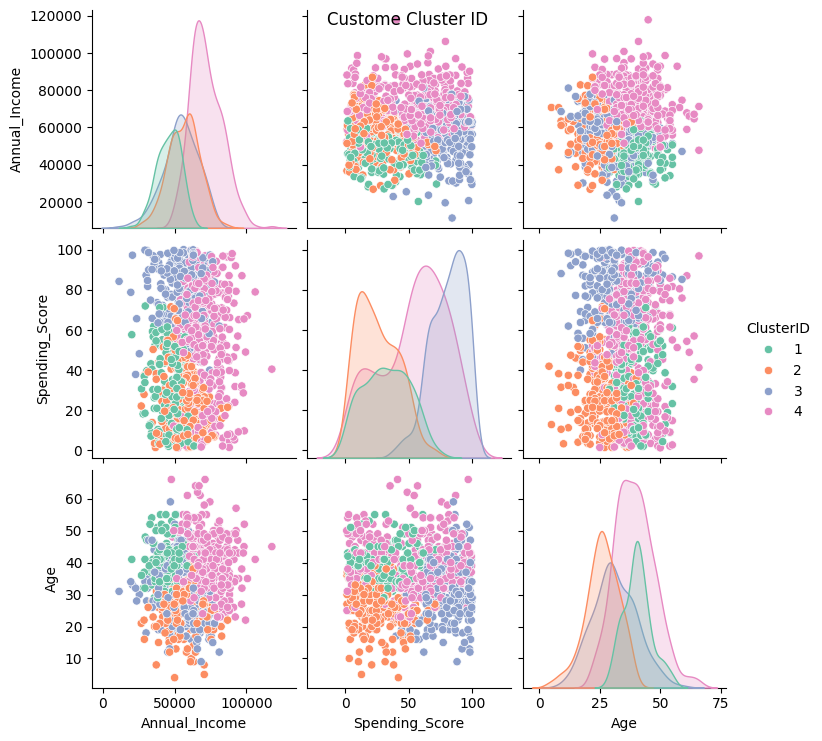

In [ ]:
#pairplot is a plot with histogram as the diagonal and scatterplot for the rest
sns.pairplot(df, hue='ClusterID', vars=['Annual_Income','Spending_Score','Age'], palette='Set2')
plt.suptitle("Custome Cluster ID")
plt.show()

In [ ]:
#3D Visualization
import plotly.express as px

In [ ]:
fig=px.scatter_3d(df,x='Annual_Income',y='Spending_Score',z='Age', color='ClusterID',hover_name='ClusterID', title='3D Visualisation')
fig.update_layout(scene=dict(xaxis_title='Annual_Income',yaxis_title='Spending_Score',zaxis_title='Age'), width=1000, height=900)
fig.show()